# <font color='#1a5276'> <b> <center> Linear Regression - Multiple output </center> </b> </font>

## <font color='blue'>  Table of Contents </font>

1. [Introduction](#1)
2. [Setup](#2)
3. [Data](#3) <br>
4. [Model](#4) <br>
5. [Training and predictions](#5)
6. [References](#references)

<a name="1"></a>
## <font color='blue'> <b> 1. Introduction </b> </font>

This project explores the implementation of linear regression models with multiple outputs using PyTorch. Having previously implemented linear regression for scenarios involving a single output—both with one and multiple predictors—this extension will handle cases where the model predicts multiple outputs simultaneously. The project aims to deepen understanding of PyTorch’s flexibility in modeling and optimizing linear regression systems with multi-dimensional output spaces.

<a name="2"></a>
## <font color='blue'> <b> 2. Setup </b> </font>

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [3]:
torch.manual_seed(1)

<a name="3"></a>
## <font color='blue'> <b> 3. Data </b> </font>

In [4]:
from torch.utils.data import Dataset, DataLoader

In [5]:
# Define a custom Dataset class
class Data(Dataset):
    def __init__(self):
        # Initialize the feature tensor with zeros of shape (20, 2)
        self.x = torch.zeros(20, 2)
        
        # Set the first column of x with values ranging from -1 to 0.9 (step 0.1)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        
        # Set the second column of x with random noise added to the ascending range
        self.x[:, 1] = torch.arange(-1, 1, 0.1) + 0.1 * torch.randn(20)
        
        # Define a weight matrix (2x2) for the linear relationship
        self.w = torch.tensor([[1.0, -1.0], [1.0, 3.0]])
        
        # Define a bias term (1x2) for the linear relationship
        self.b = torch.tensor([[1.0, -1.0]])
        
        # Calculate the linear transformation: f = x * w + b
        self.f = torch.mm(self.x, self.w) + self.b
        
        # Add Gaussian noise to the target values to simulate real-world data
        self.y = self.f + 0.001 * torch.randn((self.x.shape[0], 1))
        
        # Store the number of data points
        self.len = self.x.shape[0]

    # Method to retrieve a single data point (features and target)
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Method to get the total number of data points in the dataset
    def __len__(self):
        return self.len


In [6]:
# create a Data object
dataset = Data()

Let's inspect the data a little bit.

In [7]:
# let's see a couple of items
print(dataset[0])  # Calls dataset.__getitem__(0), returns values of x and y
print(dataset[7])

(tensor([-1.0000, -1.1526]), tensor([-1.1524, -3.4575]))
(tensor([-0.3000, -0.2193]), tensor([ 0.4794, -1.3591]))


In [8]:
aux = dataset[1]
type(aux) # tuple: self.x[index], self.y[index] 

tuple

In [9]:
print(type(dataset[0][0]))  # This is the type of self.x[index], which is a tensor
print(type(dataset[0][1]))  # This is the type of self.y[index], which is also a tensor

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [10]:
print(dataset[0][0])
print(dataset[0][1])

tensor([-1.0000, -1.1526])
tensor([-1.1524, -3.4575])


In [11]:
print(f"Shape of the input: {dataset[0][0].shape}")
print(f"Shape of the output: {dataset[0][1].shape}")

Shape of the input: torch.Size([2])
Shape of the output: torch.Size([2])


<a name="4"></a>
## <font color='blue'> <b> 4. Model</b> </font>

In [12]:
class linear_regression(nn.Module):
    
    # constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # predictions
    def forward(self, x):
        yhat = self.linear(x)
        return yhat


In [13]:
# model
model = linear_regression(2, 2)

In [14]:
# optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [15]:
# loss function
criterion = nn.MSELoss()

In [16]:
# train loader
train_loader = DataLoader(dataset=dataset, batch_size=5)

<a name="5"></a>
## <font color='blue'> <b> 5. Training and predictions </b> </font>

In [17]:
def train(train_loader, epochs=50):
    
    # to store average loss per epoch
    loss_results = []
    
    for epoch in range(epochs):
        epoch_loss = 0.0 # variable to accumulate loss for this epoch
        
        for x, y in train_loader:
            # make a prediction
            yhat = model(x)
            
            # calculate the loss
            loss = criterion(yhat, y)
            
            # accumulate the loss for averaging later
            epoch_loss += loss.item()
            
            # clear gradients
            optimizer.zero_grad()
            
            # backward pass: compute gradients of the loss
            loss.backward()
            
            # update model parameters
            optimizer.step()
            
        # store the average loss for the epoch
        avg_epoch_loss = epoch_loss / len(train_loader)
        loss_results.append(avg_epoch_loss)
        
    return loss_results

In [18]:
results = train(train_loader)

### Plot results

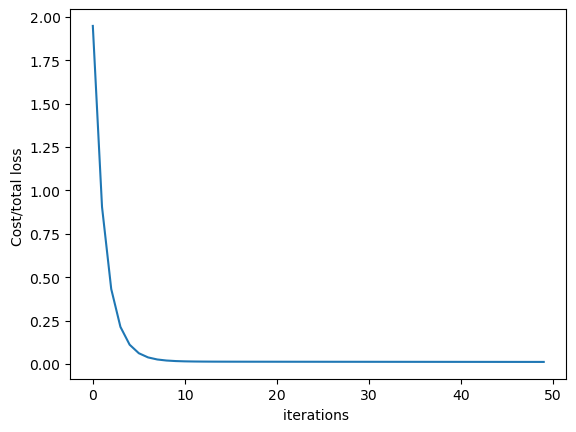

In [19]:
plt.plot(results)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

### Predictions

In [20]:
# trained model
model.eval()  # Set the model to evaluation mode

# Input data
x = torch.tensor([[1.0, 2.0]])

# Make predictions
with torch.no_grad():  # Disable gradient calculation
    yhat = model(x)  # Pass input through the model to get predictions

print(f'Predicted Output: {yhat}')


Predicted Output: tensor([[3.8987, 2.3169]])


In [21]:
x.shape

torch.Size([1, 2])

In [22]:
# Example batch of input data (x) - let's say it has 10 samples, each with 2 features
x_batch = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0], 
                       [7.0, 8.0], [9.0, 10.0], [11.0, 12.0],
                       [13.0, 14.0], [15.0, 16.0], [17.0, 18.0], [19.0, 20.0]])


# Make predictions for the entire batch
with torch.no_grad():
    yhat_batch = model(x_batch)

print(f'Predicted Output for the Batch: {yhat_batch}')


Predicted Output for the Batch: tensor([[ 3.8987,  2.3169],
        [ 7.9142,  6.5621],
        [11.9297, 10.8073],
        [15.9452, 15.0525],
        [19.9607, 19.2977],
        [23.9761, 23.5429],
        [27.9916, 27.7881],
        [32.0071, 32.0333],
        [36.0226, 36.2785],
        [40.0381, 40.5237]])


In [24]:
yhat_batch.shape

torch.Size([10, 2])

<a name="references"></a>
## <font color='blue'> <b> References </b> </font>

[IBM AI Engineering Professional Certificate](https://www.coursera.org/professional-certificates/ai-engineer)